## **Setup & Load the Data**
---

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [3]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


---
## **Time Series Analysis**
### **1. Publication Frequency Over Time:**

C:\Users\Admin\AppData\Local\Temp\ipykernel_15772\2758486026.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.groupby(pd.Grouper(key='date', freq='M')).size()


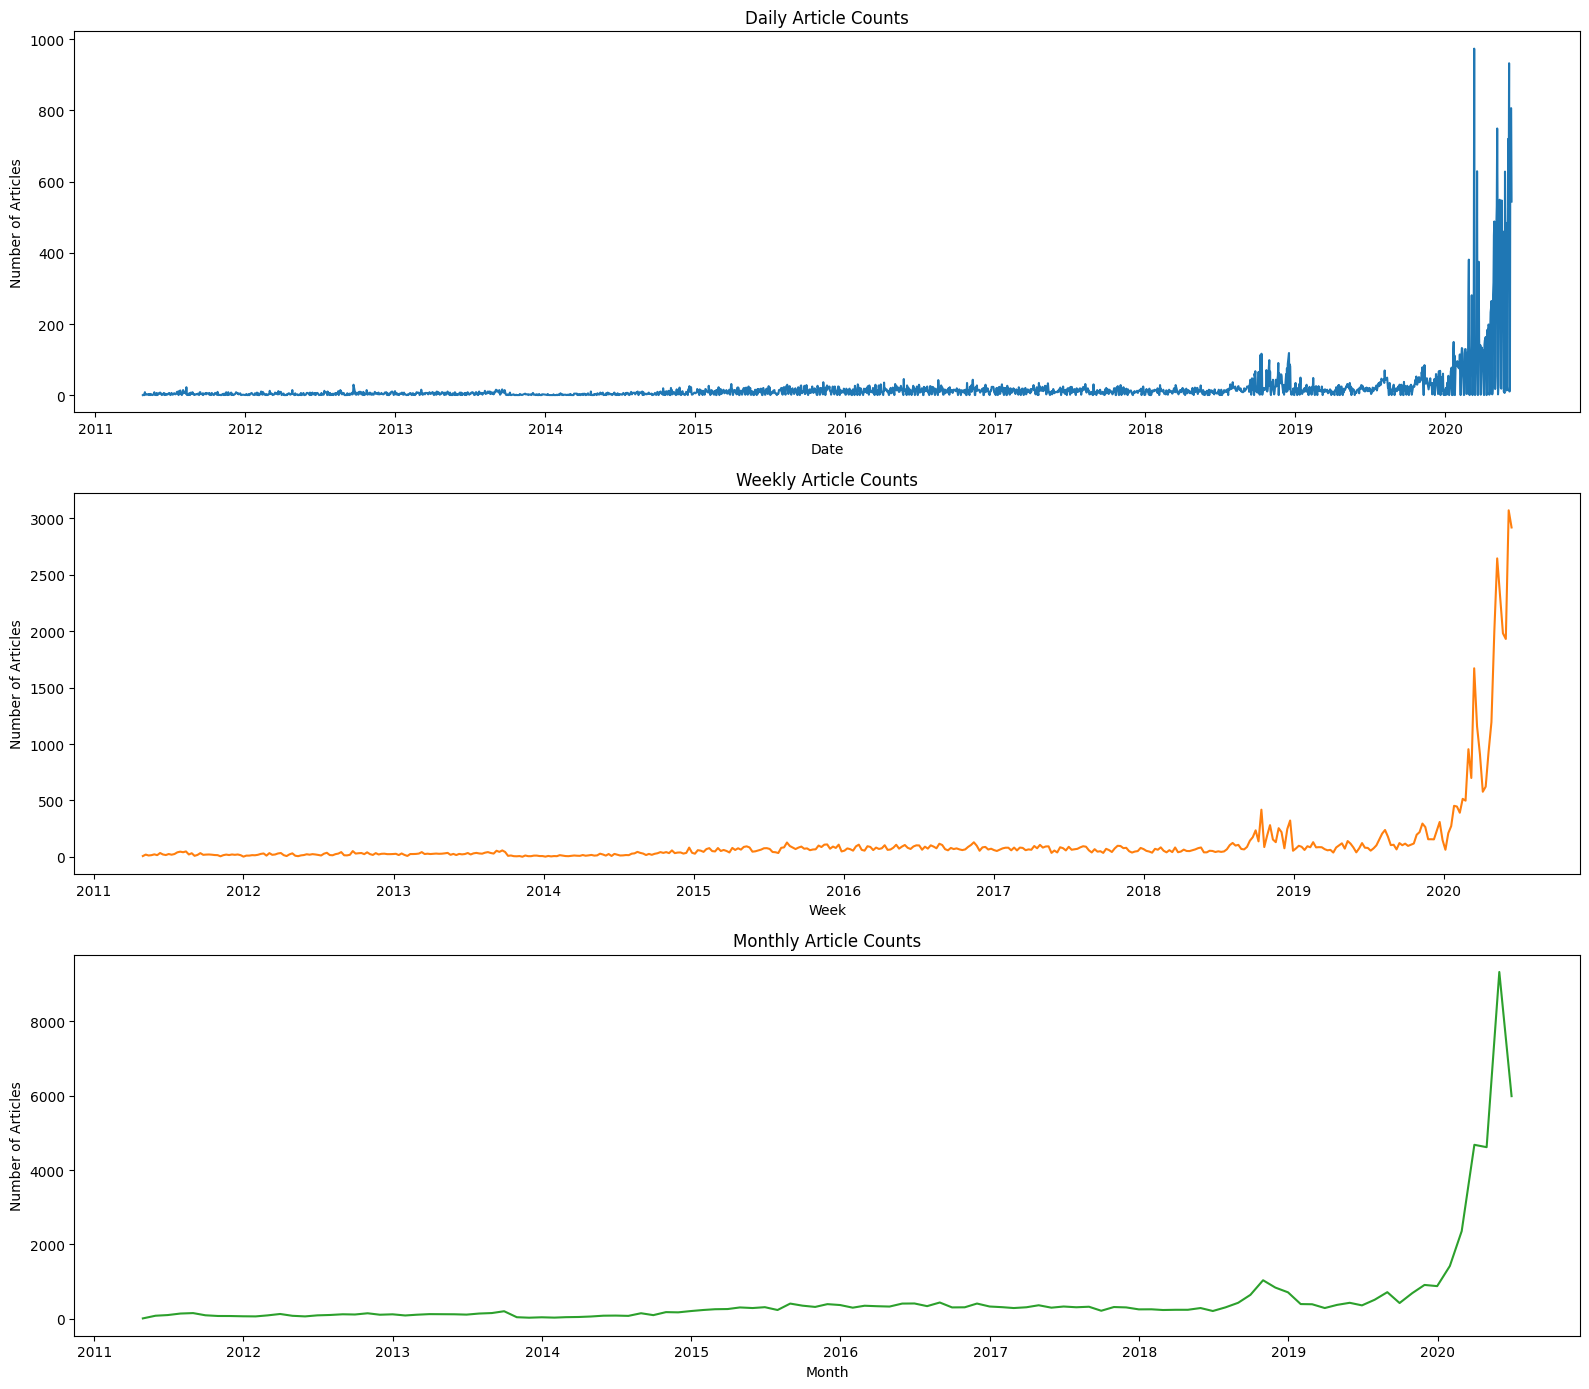

In [6]:
# Aggregate article counts by day, week, and month
daily_counts = df.groupby(df['date'].dt.date).size()
weekly_counts = df.groupby(pd.Grouper(key='date', freq='W')).size()
monthly_counts = df.groupby(pd.Grouper(key='date', freq='M')).size()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(16, 14), sharex=False)

# Daily
axes[0].plot(daily_counts.index, daily_counts.values, color='tab:blue')
axes[0].set_title('Daily Article Counts')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Articles')

# Weekly
axes[1].plot(weekly_counts.index, weekly_counts.values, color='tab:orange')
axes[1].set_title('Weekly Article Counts')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Number of Articles')

# Monthly
axes[2].plot(monthly_counts.index, monthly_counts.values, color='tab:green')
axes[2].set_title('Monthly Article Counts')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Articles')

plt.tight_layout()
plt.show()

### **Summary: Publication Frequency Over Time**

The publication frequency analysis visualizes how many articles were published each day. The time series plot shows fluctuations in the number of articles, with certain days experiencing higher publication activity. For example, on June 5, 2020, there were 62 articles published, while on May 22, 2020, there were 26 articles. This analysis helps identify trends, peak publication periods, and potential patterns in article releases over time.

---

### **2. Publishing Time Analysis**

C:\Users\Admin\AppData\Local\Temp\ipykernel_15772\4245813117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_pub.index, y=hourly_pub.values, palette='viridis')


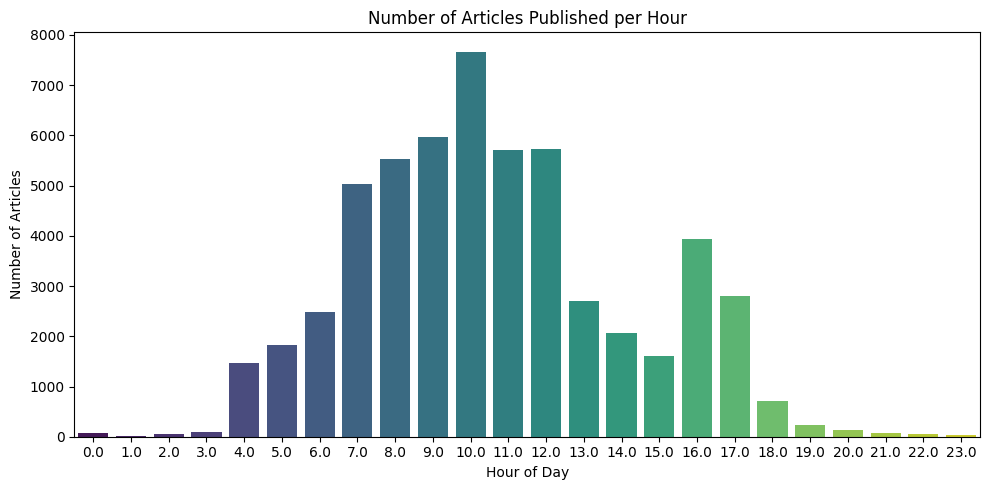

Peak publishing hour(s): [10.0]


In [5]:
# Extract hour from the 'date' column
df['hour'] = df['date'].dt.hour

# Aggregate number of articles published per hour
hourly_pub = df.groupby('hour').size()

# Visualize the number of articles published per hour
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_pub.index, y=hourly_pub.values, palette='viridis')
plt.title('Number of Articles Published per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Identify peak publishing hours
peak_hours = hourly_pub[hourly_pub == hourly_pub.max()].index.tolist()
print(f"Peak publishing hour(s): {peak_hours}")

### **Summary: Publishing Time Analysis**

The publishing time analysis examines when articles are most frequently published throughout the day. By extracting the hour from each article's timestamp, we observe the distribution of publication counts across all 24 hours. The bar plot reveals that article publication peaks at 10:00 AM, indicating this is the most active hour for new content releases. This insight can help identify optimal times for monitoring or distributing news updates.